In [1]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

/home/kazu/python/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


Text(0, 0.5, 'feature 2')

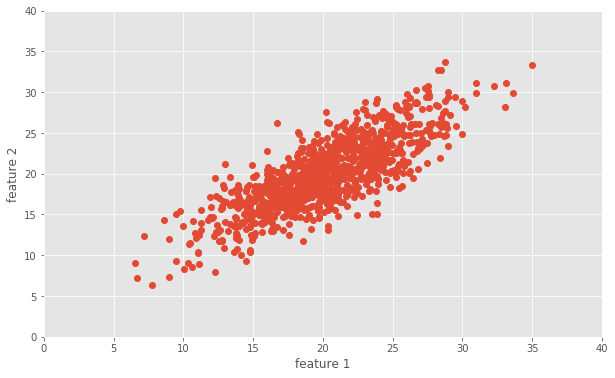

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [3]:
X = np.vstack((x, y)).T

In [4]:
import cv2
# 主成分分析
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71459675,  0.69953662],
       [-0.69953662,  0.71459675]])

Text(0, 0.5, 'feature 2')

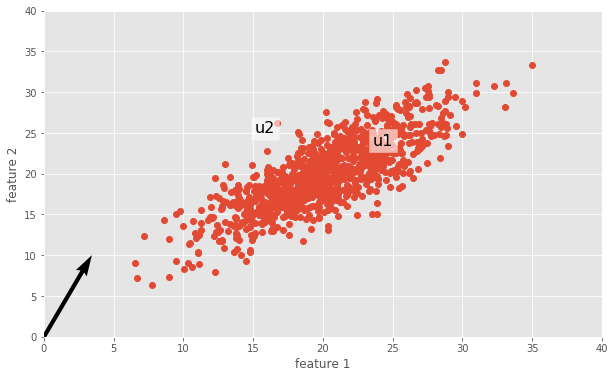

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[0, 0], 0.6*eig[1, 0], 0.6*eig[0, 1], 
           eig[1, 1], zorder=3, scale=0.1, units='xy')
plt.text(mean[0]+5*eig[0,0], mean[1]+5*eig[0,1],
         'u1', zorder=5, fontsize=16,
         bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0]+7*eig[1,0], mean[1]+7*eig[1,1],
         'u2', zorder=5, fontsize=16,
         bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [6]:
X2 = cv2.PCAProject(X, mu, eig)

[-20, 20, -10, 10]

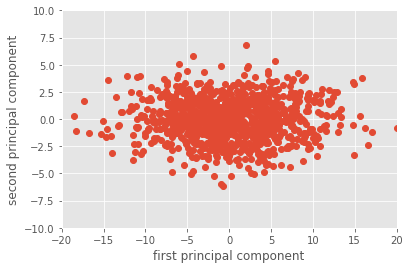

In [7]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

[-0.2, 0.2, -0.2, 0.2]

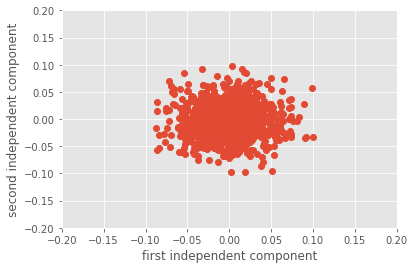

In [12]:
# 独立主成分分析を実装する
from sklearn import decomposition
ica = decomposition.FastICA()

X2 = ica.fit_transform(X)

plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

[-5, 15, -5, 15]

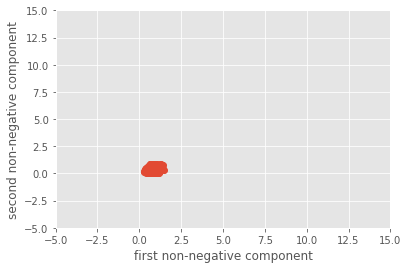

In [15]:
# 非負値行列因子分解を実装する
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([-5, 15, -5, 15])
# plt.axis([-1, 2.5, -2.5, 2.5])